# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [58]:
#a)

from sympy import *
import numpy as np
import math
import matplotlib.pyplot as plt

init_printing()

x = symbols('x')
y = cos(x)
z = sin(x)
w = 1/(sin(x)+cos(2*x))
g = y * z

print(y)
print(z)
print(w)
print(g)

cos(x)
sin(x)
1/(sin(x) + cos(2*x))
sin(x)*cos(x)


In [47]:
#b)

derivada_g = diff(g,x)
derivada_g

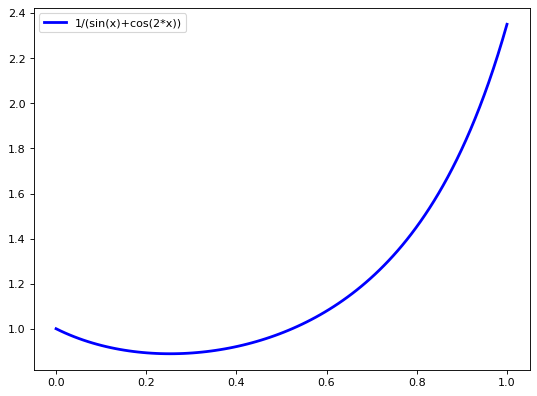

In [59]:
#c)

X = np.linspace(0, 1, 100, endpoint=True)
W = 1/(np.sin(X)+np.cos(2*X))

plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(1, 1, 1)

plt.plot(X, W, color="blue", linewidth=2.5, linestyle="-", label="1/(sin(x)+cos(2*x))")

plt.legend(loc='best')


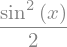

In [45]:
#d)

int_g_und = integrate(g, x)
int_g_und

In [51]:
int_w = integrate(g, (x, 0, 1))
int_w.evalf()

In [54]:
#e)

limit(y, x, 0)

In [55]:
limit(z, x, 0)

In [56]:
limit(w, x, 0)

In [57]:
limit(g, x, 0)

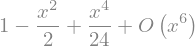

In [52]:
#f)

y.series(x,0)

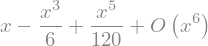

In [53]:
z.series(x,0)

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

/tmp/ipykernel_146/3399785042.py:27: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t=linspace(t_ini,t_fin,numsteps)
/tmp/ipykernel_146/3399785042.py:29: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  x=zeros(numsteps)
/tmp/ipykernel_146/3399785042.py:30: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  y=zeros(numsteps)
/tmp/ipykernel_146/3399785042.py:31: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  z=zeros(numsteps)


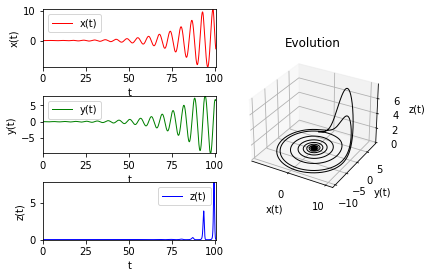

In [60]:
#ESTA CLARAMENTE NO ES MI SOLUCION PERO LA PEGUE AQUI PARA VER SI ME AYUDABA A ENTENDER, SPOILER ALERT: IT DIDNT

from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D

#We define a function which is going to be the recursive function.
def num_rossler(x_n,y_n,z_n,h,a,b,c):
    x_n1=x_n+h*(-y_n-z_n)
    y_n1=y_n+h*(x_n+a*y_n)
    z_n1=z_n+h*(b+z_n*(x_n-c))   
    return x_n1,y_n1,z_n1

#Now we prepare some variables
#First the parameters
a=0.13
b=0.2
c=6.5

#Them the time interval and the step size
t_ini=0
t_fin=32*pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x=zeros(numsteps)
y=zeros(numsteps)
z=zeros(numsteps)

#We set the initial conditions
x[0]=0
y[0]=0
z[0]=0

#This is the main loop where we use the recursive system to obtain the solution
for k in range(x.size-1):
    #We use the previous point to generate the new point using the recursion
    [x[k+1],y[k+1],z[k+1]]=num_rossler(x[k],y[k],z[k],t[k+1]-t[k],a,b,c)
   

#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.

fig = figure()
ax1 = fig.add_axes([0.1, 0.7, 0.4, 0.2])
ax2 = fig.add_axes([0.1, 0.4, 0.4, 0.2])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.2])
ax4 = fig.add_axes([0.55, 0.25, 0.35, 0.5],projection='3d')

#And we add vectors to each plot
ax1.plot(t, x,color='red',lw=1,label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
ax1.axis((t_ini,t_fin,min(x),max(x)))

ax2.plot(t, y,color='green',lw=1,label='y(t)')
ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.legend()
ax2.axis((t_ini,t_fin,min(y),max(y)))

ax3.plot(t, z,color='blue',lw=1,label='z(t)')
ax3.set_xlabel('t')
ax3.set_ylabel('z(t)')
ax3.legend()
ax3.axis((t_ini,t_fin,min(z),max(z)))

ax4.plot(x, y,z,color='black',lw=1,label='Evolution(t)')
ax4.set_xlabel('x(t)')
ax4.set_ylabel('y(t)')
ax4.set_zlabel('z(t)')
ax4.set_title('Evolution')
#When finished we show the figure with all the plots.
show()

In [62]:
#a) Intento numero 1

from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D

t_ini=0
t_fin=32*pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

dt=linspace(t_ini,t_fin,numsteps)
x=zeros(numsteps)
y=zeros(numsteps)
z=zeros(numsteps)

a = 0.13
b = 0.2
c = 6.5

x[0] = 0
y[0] = 0
z[0] = 0


def X(state, t):
    g0 = state[1]
    g1 = -y-z
    return np.array([g0, g1])
    
def Y(state, t):
    g0 = state[1]
    g1 = x+0.13*state[0]
    return np.array([g0, g1])

def Z(state, t):
    g0 = state[1]
    g1 = 0.2+state[0]*(x-6.5)
    return np.array([g0, g1])
    
def RK2X(var, t, dt, derivadas):
    k0 = dt*X(var, t)
    k1 = dt*X(var + k0, var + dt)
    var_next = var + 0.5*(k0 + k1)
    var_next = var *(b+z_n*(x_n-c)) 
    return var_next

def RK2Y(var, t, dt, derivadas):
    k0 = dt*Y(var, t)
    k1 = dt*Y(var + k0, var + dt)
    var_next = var + 0.5*(k0 + k1)
    return var_next

def RK2Z(var, t, dt, derivadas):
    k0 = dt*Z(var, t)
    k1 = dt*Z(var + k0, var + dt)
    var_next = var + 0.5*(k0 + k1)
    return var_next

for k in range(x.size-1):
    x[k+1] = RK2X(x[k],dt[k],dt,X)
    y[k+1] = RK2Y(x[k],dt[k],dt,Y)
    z[k+1] = RK2Z(x[k],dt[k],dt,Z)



/tmp/ipykernel_146/1477630456.py:14: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  dt=linspace(t_ini,t_fin,numsteps)
/tmp/ipykernel_146/1477630456.py:15: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  x=zeros(numsteps)
/tmp/ipykernel_146/1477630456.py:16: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  y=zeros(numsteps)
/tmp/ipykernel_146/1477630456.py:17: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  z=zeros(numsteps)


IndexError: invalid index to scalar variable.

In [63]:
#a) Intento numero 2

from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D

t_ini=0
t_fin=32*pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

dt=linspace(t_ini,t_fin,numsteps)
x=zeros(numsteps)
y=zeros(numsteps)
z=zeros(numsteps)

a = 0.13
b = 0.2
c = 6.5

x[0] = 0
y[0] = 0
z[0] = 0

def methodX(state, t):
    g0 = state[0]
    g1 = -state[1]-state[2]
    return np.array([g0, g1])

def methodY(state, t):
    g0 = state[1]
    g1 = state[0]+0.13*state[1]
    return np.array([g0, g1])

def methodZ(state, t):
    g0 = state[0]
    g1 = 0.2+state[2]*(state[0]-6.5)
    return np.array([g0, g1])
    
def RK2(var, t, dt, derivadas):
    k0X = dt*methodX(var, t)
    k1X = dt*methodX(var + k0, var[0] + dt)
    k0Y = dt*methodY(var, t)
    k1Y = dt*methodY(var + k0, var[1] + dt)
    k0Z = dt*methodZ(var, t)
    k1Z = dt*methodZ(var + k0, var[2] + dt)
    var_next = []
    var_next[0] = var[0] + 0.5*(k0X + k1X)
    var_next[1] = var[1] + 0.5*(k0Y + k1Y)
    var_next[2] = var[2] + 0.5*(k0Z + k1Z)
    return var_next

for k in range(x.size-1):
    arr_k = [x[k],y[k],z[k]]
    [x[k+1],y[k+1],z[k+1]] = RK2(arr_k,dt[k],dt,X)

/tmp/ipykernel_146/3003392105.py:14: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  dt=linspace(t_ini,t_fin,numsteps)
/tmp/ipykernel_146/3003392105.py:15: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  x=zeros(numsteps)
/tmp/ipykernel_146/3003392105.py:16: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  y=zeros(numsteps)
/tmp/ipykernel_146/3003392105.py:17: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  z=zeros(numsteps)


ValueError: operands could not be broadcast together with shapes (1005309,) (2,) 

In [ ]:
#b) Graficas listas por si alguna vez funcionaba la parte a)

fig = figure()
ax1 = fig.add_axes([0.1, 0.7, 0.4, 0.2])
ax2 = fig.add_axes([0.1, 0.4, 0.4, 0.2])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.2])

ax1.plot(t, x,color='red',lw=1,label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
ax1.axis((t_ini,t_fin,min(x),max(x)))

ax2.plot(t, y,color='green',lw=1,label='y(t)')
ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.legend()
ax2.axis((t_ini,t_fin,min(y),max(y)))

ax3.plot(t, z,color='blue',lw=1,label='z(t)')
ax3.set_xlabel('t')
ax3.set_ylabel('z(t)')
ax3.legend()
ax3.axis((t_ini,t_fin,min(z),max(z)))

In [ ]:
#c) Graficas listas por si alguna vez funcionaba la parte a)


ax4 = fig.add_axes([0.55, 0.25, 0.35, 0.5],projection='3d')
ax4.plot(x, y, z,color='black',lw=1,label='Evolution(t)')
ax4.set_xlabel('x(t)')
ax4.set_ylabel('y(t)')
ax4.set_zlabel('z(t)')
ax4.set_title('Evolution')